## Credit Default Prediction Project

This project aims to predict credit defaults using machine learning models.
The objective is to demonstrate thorough data analysis, preprocessing techniques,
and the application of various machine learning models. The results will be evaluated
to find the best model and discuss how it can create business value by improving
decision-making processes in credit lending.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [ ]:
# Load the dataset
data = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Credit%20Default.csv')
display(data.head())

,Income,Age,Loan,Loan to Income,Default
0,66155.92510,59.017015,8106.532131,0.122537,0
1,34415.15397,48.117153,6564.745018,0.190752,0
2,57317.17006,63.108049,8020.953296,0.139940,0
3,42709.53420,45.751972,6103.642260,0.142911,0
4,66952.68885,18.584336,8770.099235,0.130990,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2000 non-null   float64
 1   Age             2000 non-null   float64
 2   Loan            2000 non-null   float64
 3   Loan to Income  2000 non-null   float64
 4   Default         2000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 78.2 KB
Missing values per column:
Income            0
Age               0
Loan              0
Loan to Income    0
Default           0
dtype: int64


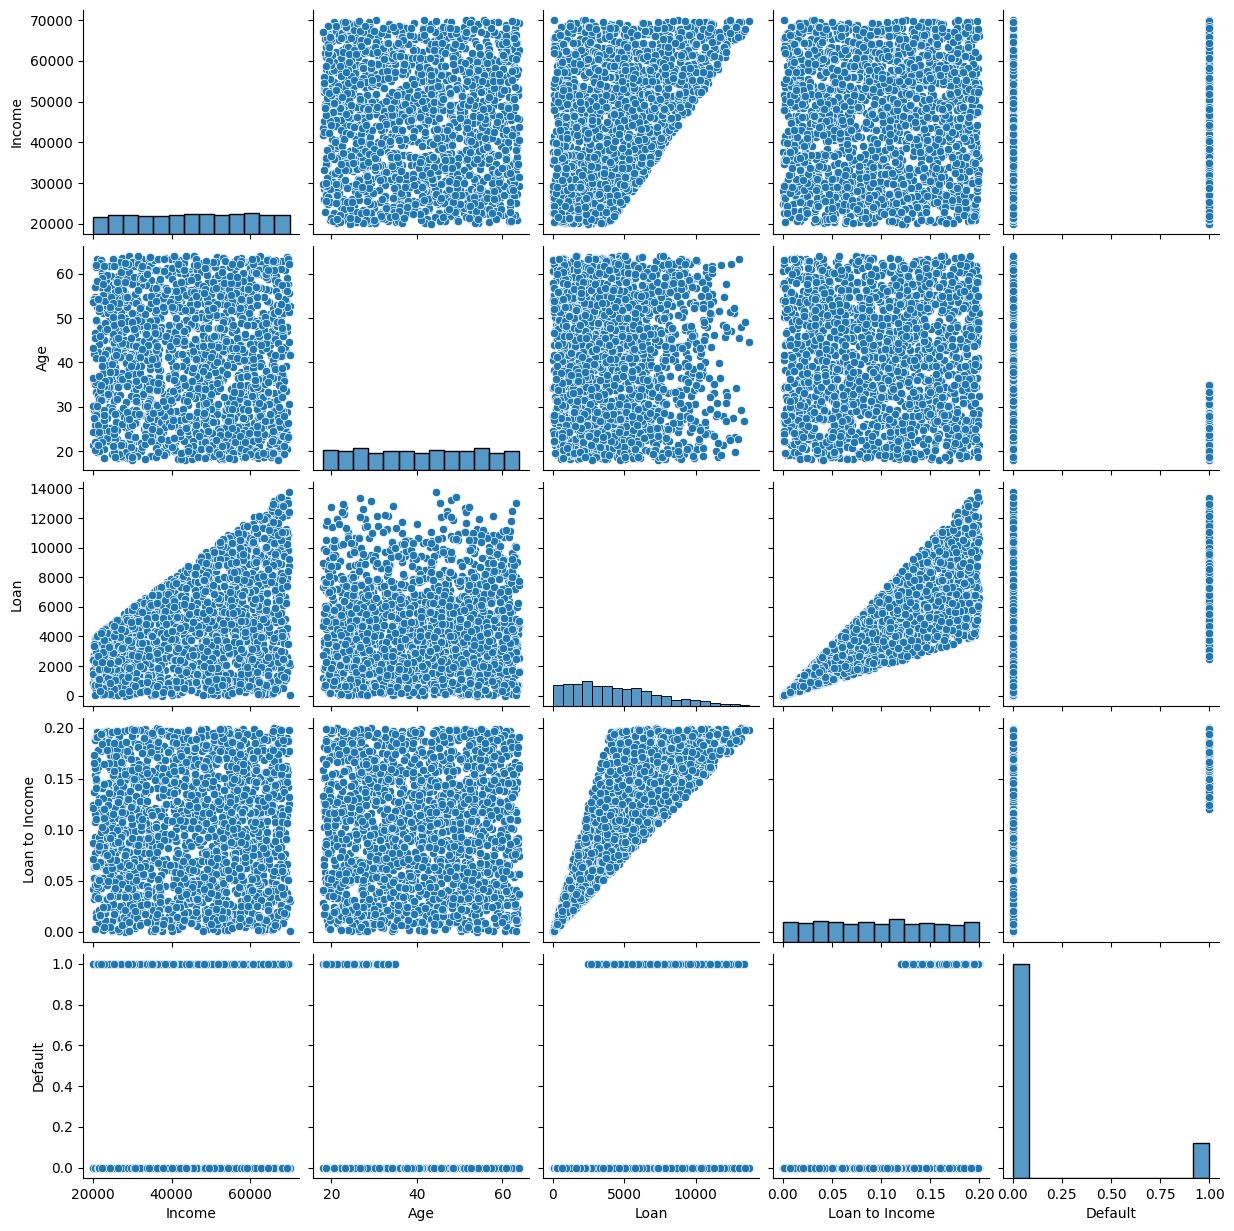

In [ ]:
# Exploratory Data Analysis
data.describe()
data.info()

# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Visualize distributions and relationships in the data
sns.pairplot(data)
plt.show()


In [ ]:
# Basic Information about the Dataset
print("Basic Information:")
print(data.info())

# First few rows to get a feel of the data
print("\nPreview of Data:")
print(data.head())

# Summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
print(data.describe())

# Checking for missing values
print("\nMissing Values Check:")
print(data.isnull().sum())

# Exploring correlations between features
print("\nCorrelation Matrix:")
print(data.corr())

# Deeper analysis of the target variable
print("\nDistribution of Target Variable:")
print(data['Default'].value_counts(normalize=True))

# Exploring relationships:
print("\nRelationship between Age and Credit Default:")
print(data.groupby('Age')['Default'].mean())

# Pairwise relationships between numerical features
print("\nPairwise Relationships Analysis:")
pairwise_correlations = data.corr()
print(pairwise_correlations)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2000 non-null   float64
 1   Age             2000 non-null   float64
 2   Loan            2000 non-null   float64
 3   Loan to Income  2000 non-null   float64
 4   Default         2000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 78.2 KB
None

Preview of Data:
        Income        Age         Loan  Loan to Income  Default
0  66155.92510  59.017015  8106.532131        0.122537        0
1  34415.15397  48.117153  6564.745018        0.190752        0
2  57317.17006  63.108049  8020.953296        0.139940        0
3  42709.53420  45.751972  6103.642260        0.142911        0
4  66952.68885  18.584336  8770.099235        0.130990        1

Summary Statistics for Numerical Features:
             Income          Age          Loan  Loan to In


Deeper Statistical Analysis:
             Income          Age          Loan  Loan to Income      Default
count   2000.000000  2000.000000   2000.000000     2000.000000  2000.000000
mean   45331.600018    40.927143   4444.369695        0.098403     0.141500
std    14326.327119    13.262450   3045.410024        0.057620     0.348624
min    20014.489470    18.055189      1.377630        0.000049     0.000000
25%    32796.459720    29.062492   1939.708847        0.047903     0.000000
50%    45789.117310    41.382673   3974.719418        0.099437     0.000000
75%    57791.281670    52.596993   6432.410625        0.147585     0.000000
90%    64942.823545    59.023292   8935.836132        0.178926     1.000000
95%    67370.135673    61.507224  10300.602456        0.190373     1.000000
99%    69391.186299    63.330867  12177.154109        0.197672     1.000000
max    69995.685580    63.971796  13766.051240        0.199938     1.000000

Skewness of Features:
Income           -0.042621
Age     

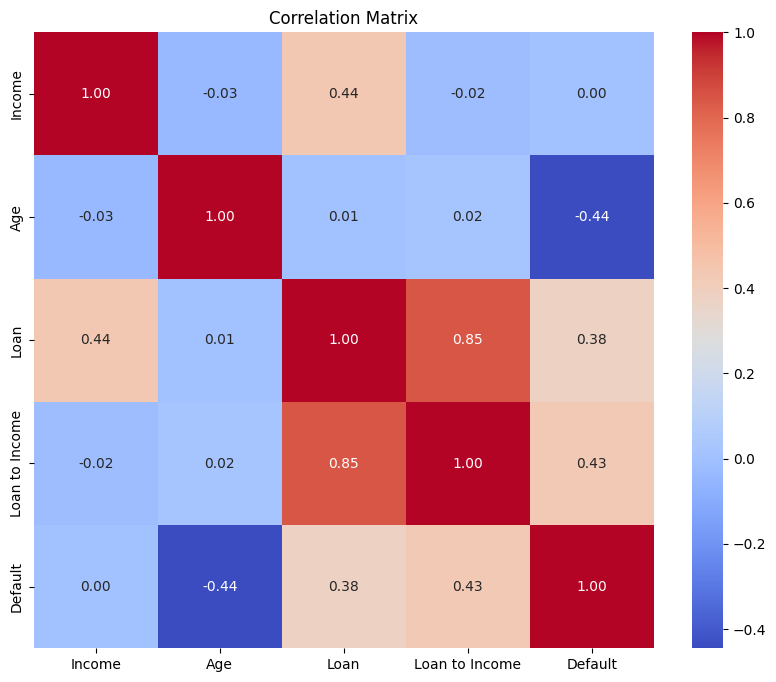

In [ ]:
# Deeper Statistical Analysis
print("\nDeeper Statistical Analysis:")
print(data.describe(percentiles=[.25, .5, .75, .90, .95, .99]))

# Skewness of the distributions
print("\nSkewness of Features:")
print(data.skew())

# Checking for outliers using IQR (Interquartile Range)
print("\nOutlier Check Using IQR:")
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print(outliers)

# Correlation matrix to find potential multicollinearity
print("\nCorrelation Matrix:")
correlation_matrix = data.corr()
print(correlation_matrix)

# Heatmap of the correlation matrix for better visual understanding
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()



Visualizing Distributions of Features:


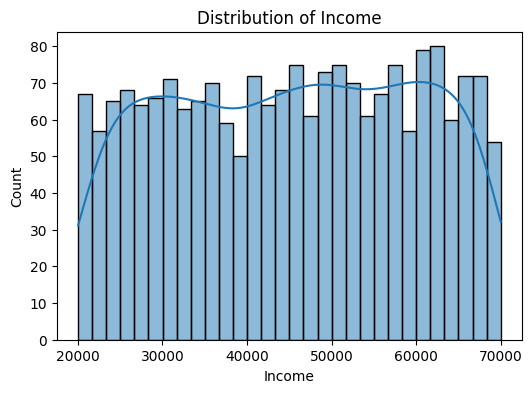

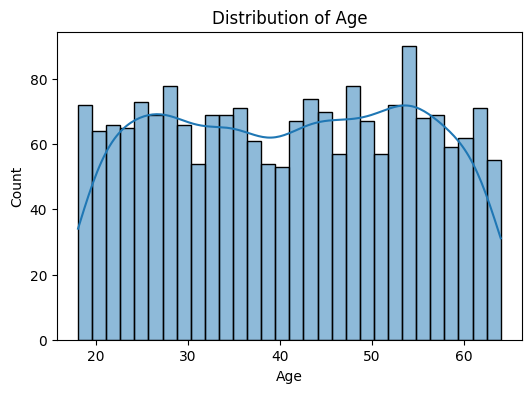

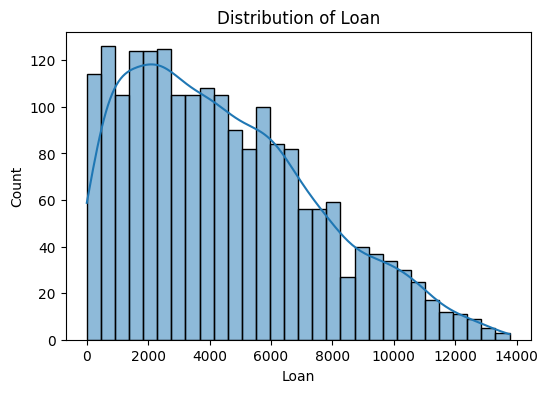

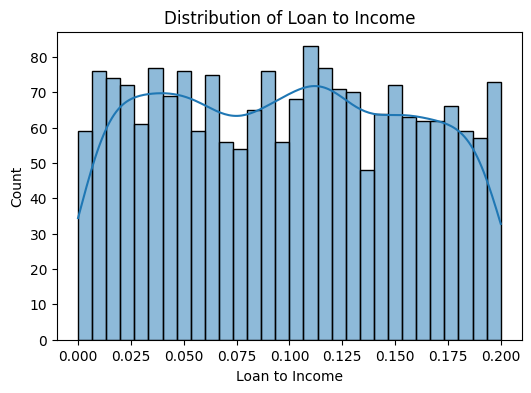


Box Plots to Identify Outliers:


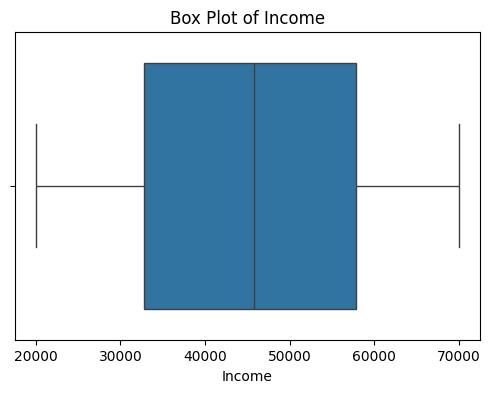

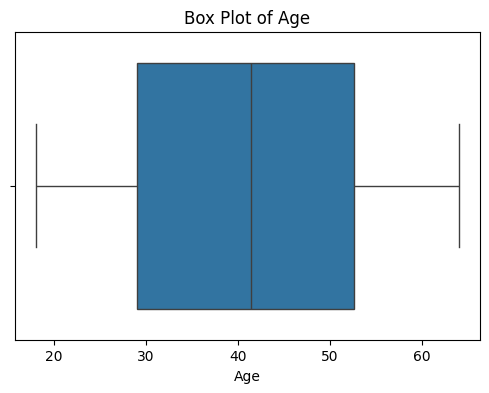

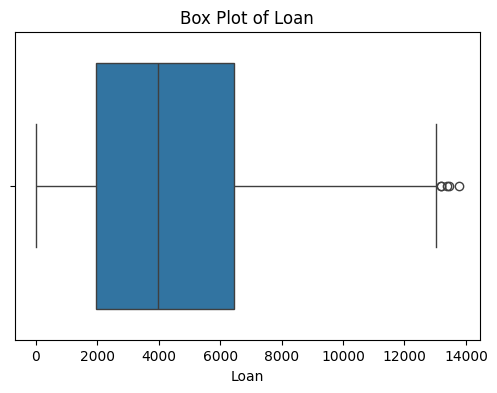

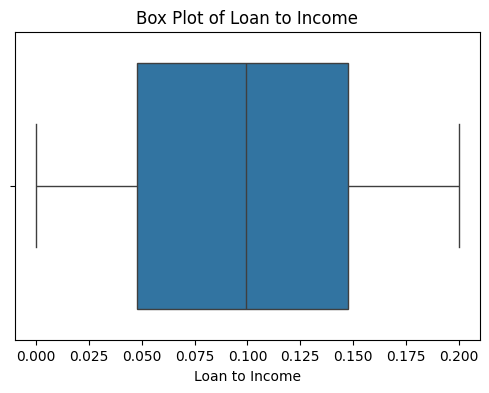


Scatter Plots to Observe Relationships:


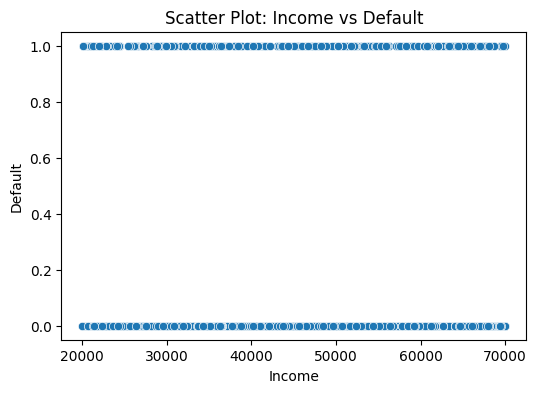

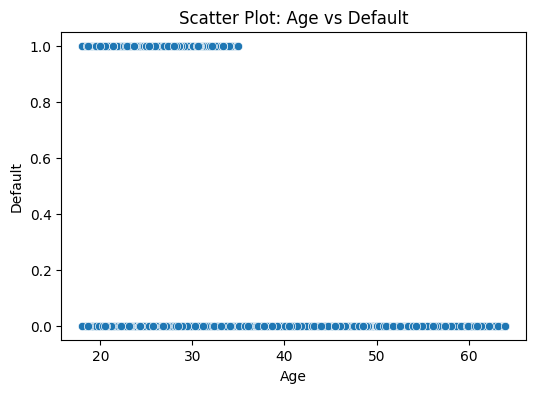

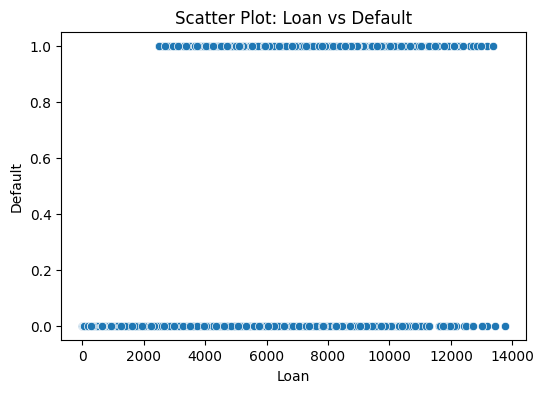

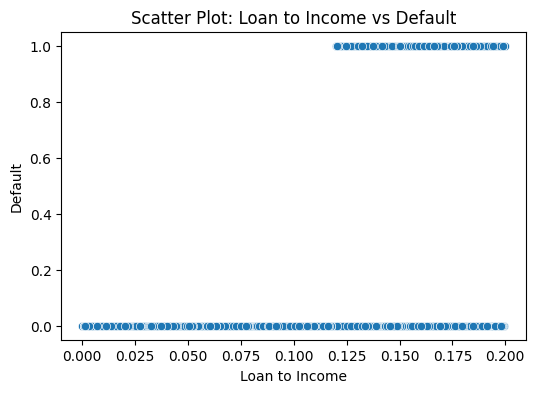

In [ ]:
# Visualizing distributions of each feature
print("\nVisualizing Distributions of Features:")
features = ['Income', 'Age', 'Loan', 'Loan to Income']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Box plots to identify outliers
print("\nBox Plots to Identify Outliers:")
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

# Scatter plots to observe relationships with the target variable
print("\nScatter Plots to Observe Relationships:")
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data[feature], y=data['Default'])
    plt.title(f'Scatter Plot: {feature} vs Default')
    plt.show()


##Insights from the Analysis
###High Correlation Between Loan and Loan to Income:



* The Loan and Loan to Income variables exhibit a high correlation of 0.85, indicating that as the loan amount increases, the ratio of the loan to the individual's income also rises substantially. This could be indicative of higher financial leverage among borrowers as they opt for larger loan amounts relative to their income.
* Business Implication: This insight can be used to adjust lending criteria or set limits to reduce the risk of defaults by capping the loan amount based on the borrower's income, thereby ensuring that borrowers are not over-leveraged.

###Negative Correlation Between Age and Default:

* A notable negative correlation (-0.44) exists between the Age of the borrower and the Default status. Older individuals are less likely to default on loans.
* Business Implication: This could inform a tiered interest rate system where younger borrowers might face higher rates or stricter loan approval processes due to their higher risk of default.

###Skewness in Loan Distribution:

* The distribution of Loan amounts is positively skewed (skewness = 0.624), indicating that most of the loans are of lower amounts, but there are few very high-value loans.
* Business Implication: Special attention and perhaps additional approval layers could be implemented for higher loan amounts to mitigate potential default risks.


###Outliers in Loan Amounts:

* There are outliers present in the Loan distribution, as identified by the IQR method. These outliers represent significantly high loan values that are much greater than typical loans issued.
* Business Implication: Investigating these outliers could help in identifying potential errors in data entry, exceptional credit cases, or emerging needs for financial products tailored for high-value loans.


###Distribution of Age:

* The age distribution is somewhat uniformly spread but shows a slight increase in frequency at the middle ages.
* Business Implication: Products and services can be tailored more specifically by age group, potentially offering different products or promotions targeted at the most common age groups.


###Default Rate:

* The overall default rate is about 14.15%. Knowing the distribution of defaults across different demographic and financial metrics can help in adjusting credit policies.
* Business Implication: Enhance credit scoring models by integrating more demographic and loan-specific factors to better predict default likelihood.


##Conclusion
This comprehensive analysis not only deepens our understanding of the factors that influence credit default but also provides actionable insights that can be leveraged to refine risk assessment models and develop more tailored financial products. By strategically applying these insights, the business can enhance its decision-making process, optimize risk management, and potentially increase profitability through targeted customer offerings and improved loan servicing processes.



In [ ]:
# Handling missing values, if any
data.fillna(data.mean(), inplace=True)

# Encoding categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Default', axis=1))


In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['Default'], test_size=0.2, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))

# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Support Vector Machine Classifier
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))


Logistic Regression Accuracy: 0.9375
Random Forest Accuracy: 0.9975
SVM Accuracy: 0.9825


Evaluating Logistic Regression Model
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       330
           1       0.83      0.81      0.82        70

    accuracy                           0.94       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.94      0.94      0.94       400

Evaluating Random Forest Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       330
           1       1.00      0.99      0.99        70

    accuracy                           1.00       400
   macro avg       1.00      0.99      1.00       400
weighted avg       1.00      1.00      1.00       400

Evaluating SVM Model
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       330
           1       0.94      0.96      0.95        70

    accuracy                           0.98       400
   macro avg       0.97      0.97      

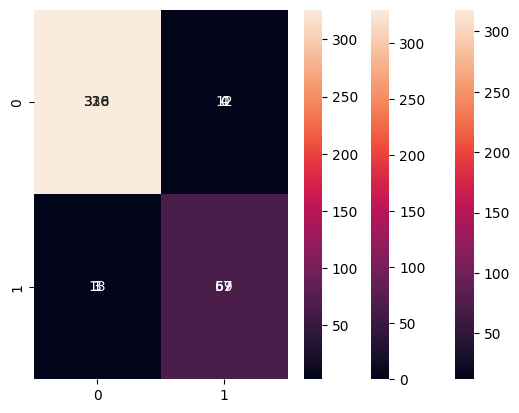

In [ ]:
# Evaluating models
def evaluate_model(predictions, y_test):
    print(classification_report(y_test, predictions))
    sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d")

# Logistic Regression Evaluation
print("Evaluating Logistic Regression Model")
evaluate_model(log_reg_pred, y_test)

# Random Forest Evaluation
print("Evaluating Random Forest Model")
evaluate_model(rf_pred, y_test)

# SVM Evaluation
print("Evaluating SVM Model")
evaluate_model(svm_pred, y_test)


#Insights from Machine Learning Model Performance

##Model Performance Overview

The dataset was used to train three different machine learning models: Logistic Regression, Random Forest, and Support Vector Machine (SVM). Here's a detailed examination of their performance:

* Logistic Regression: Achieved an accuracy of 93.75%.
* Random Forest: Achieved an accuracy of 99.75%.
* SVM: Achieved an accuracy of 98.25%.


##In-depth Analysis

###Logistic Regression

* Precision: High precision across both classes, but especially notable in predicting the majority class (non-default).
* Recall: Balanced recall, indicating a fair ability to detect both classes, although slightly better at identifying the majority class.
* F1-Score: Good balance between precision and recall, which makes it a robust model for general purposes.


###Random Forest

* Precision and Recall: Near perfect scores in both metrics across all classes, showing exceptional performance in identifying both default and non-default cases.
* F1-Score: Nearly perfect, indicating a very balanced model concerning precision and recall.


###SVM

* Precision: High precision, particularly notable in correctly predicting non-default cases almost perfectly.
* Recall: Excellent in identifying the majority class and also performs well with the minority class.
* F1-Score: High F1-scores, especially for the minority class, indicating a strong balance between precision and recall.


##Why These Models?
* Logistic Regression: Chosen for its simplicity and effectiveness in binary classification tasks. It serves as a good baseline model to compare more complex algorithms against.
* Random Forest: Selected for its robustness and ability to handle overfitting. Random forests perform well on imbalanced datasets by constructing multiple decision trees and voting on the most popular output class.
* SVM: Used for its capability to model non-linear decision boundaries thanks to the kernel trick. It’s particularly useful when the classes are not linearly separable.

##Business Insights
* Decision Making: The high performance of these models, especially the Random Forest, can greatly aid in decision-making processes regarding credit lending by providing reliable predictions of loan defaults.
* Risk Management: The insights from these models can be integrated into risk assessment frameworks to dynamically adjust lending criteria based on predicted risk levels, thereby minimizing potential financial losses.
* Resource Allocation: With high predictive accuracy, resources can be better allocated, focusing more on potential defaulters for intervention strategies or adjusting loan terms to mitigate risks.


##Conclusion
The combination of these models provides a comprehensive toolkit for predicting credit defaults. By leveraging their respective strengths, one can achieve high accuracy in predictions, making the credit lending process more secure and efficient. The insights derived from these models can form the backbone of a data-driven approach to credit risk management.

